In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='dark')

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train.isnull().mean().mul(100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [9]:
train.duplicated().sum()

0

## Data Processing

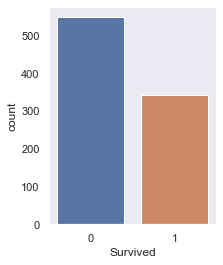

0    549
1    342
Name: Survived, dtype: int64

In [10]:
plt.figure(figsize=(3, 4))

sns.countplot(x=train['Survived'])

plt.show()

train['Survived'].value_counts()

In [11]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

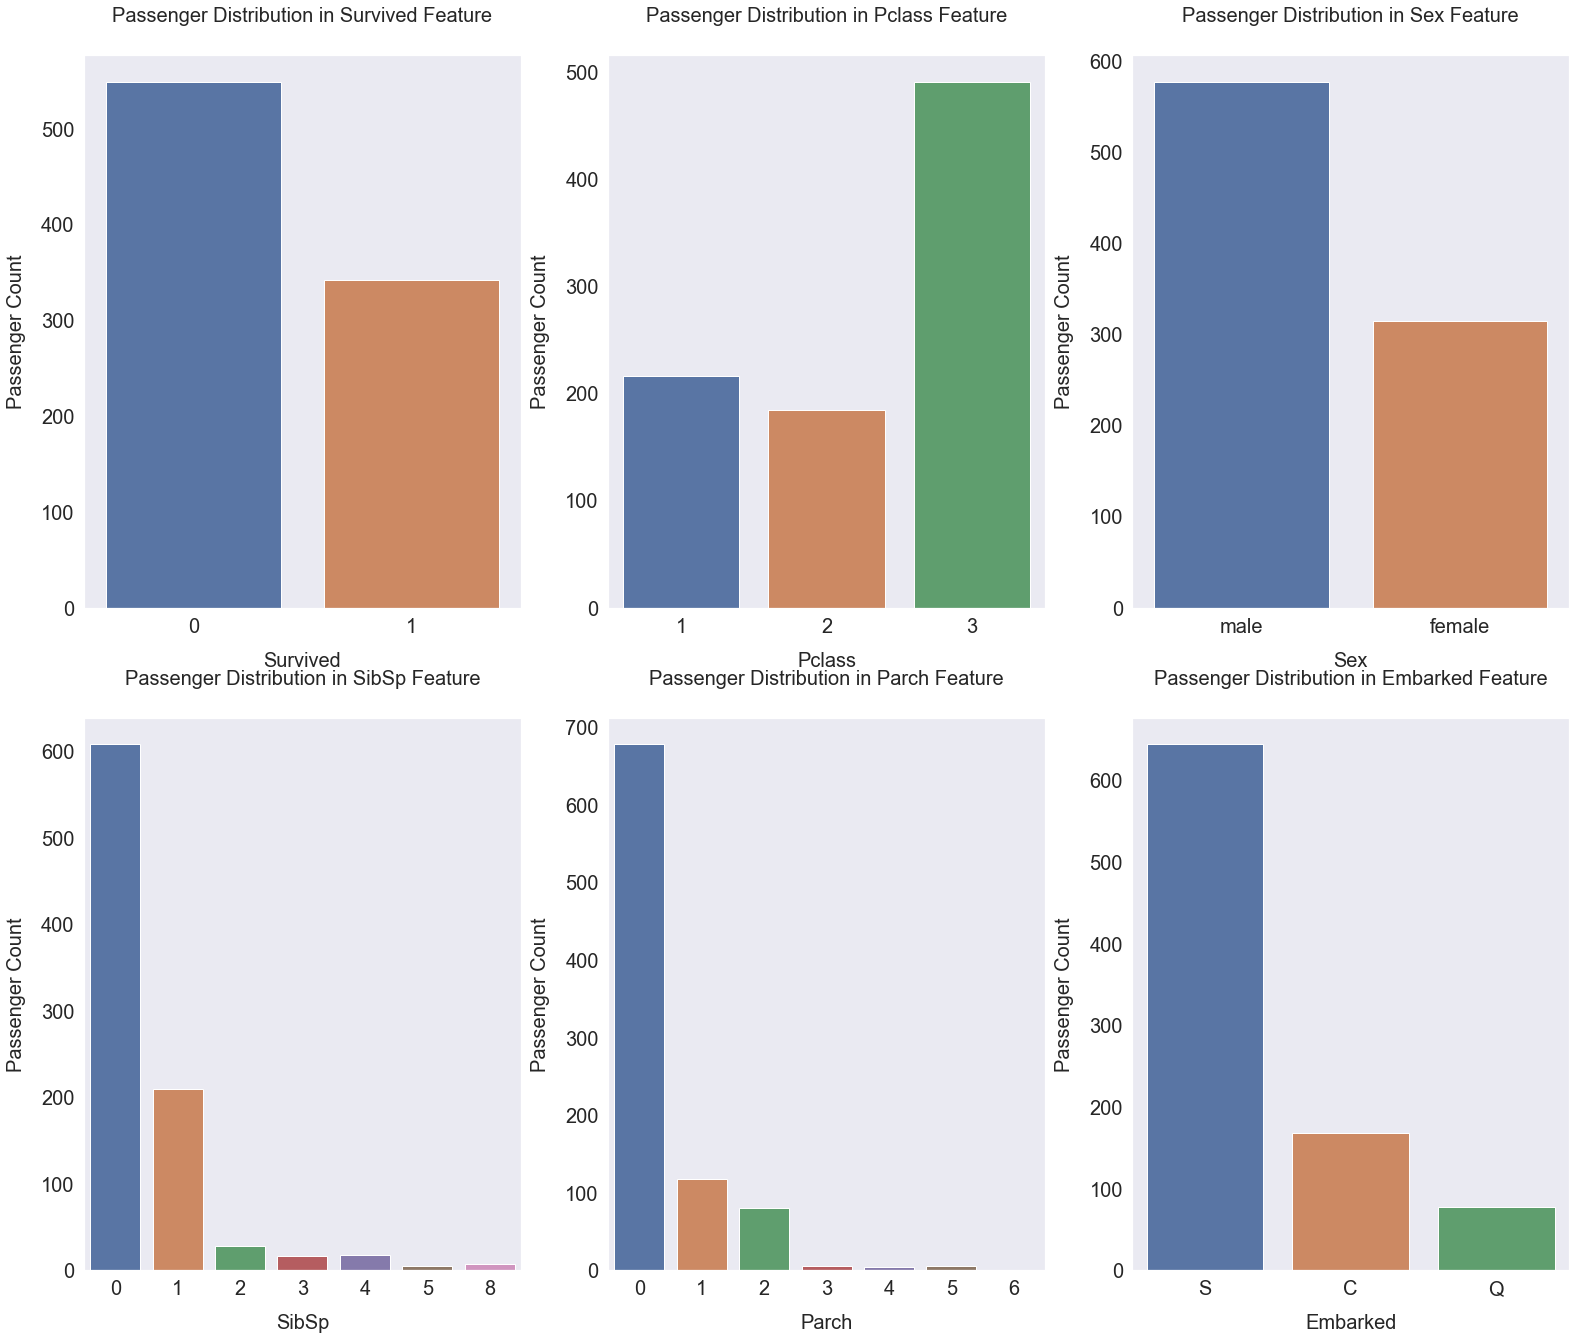

In [12]:
cat_features = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(15, 15))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):    
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, data=train)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.title('Passenger Distribution in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

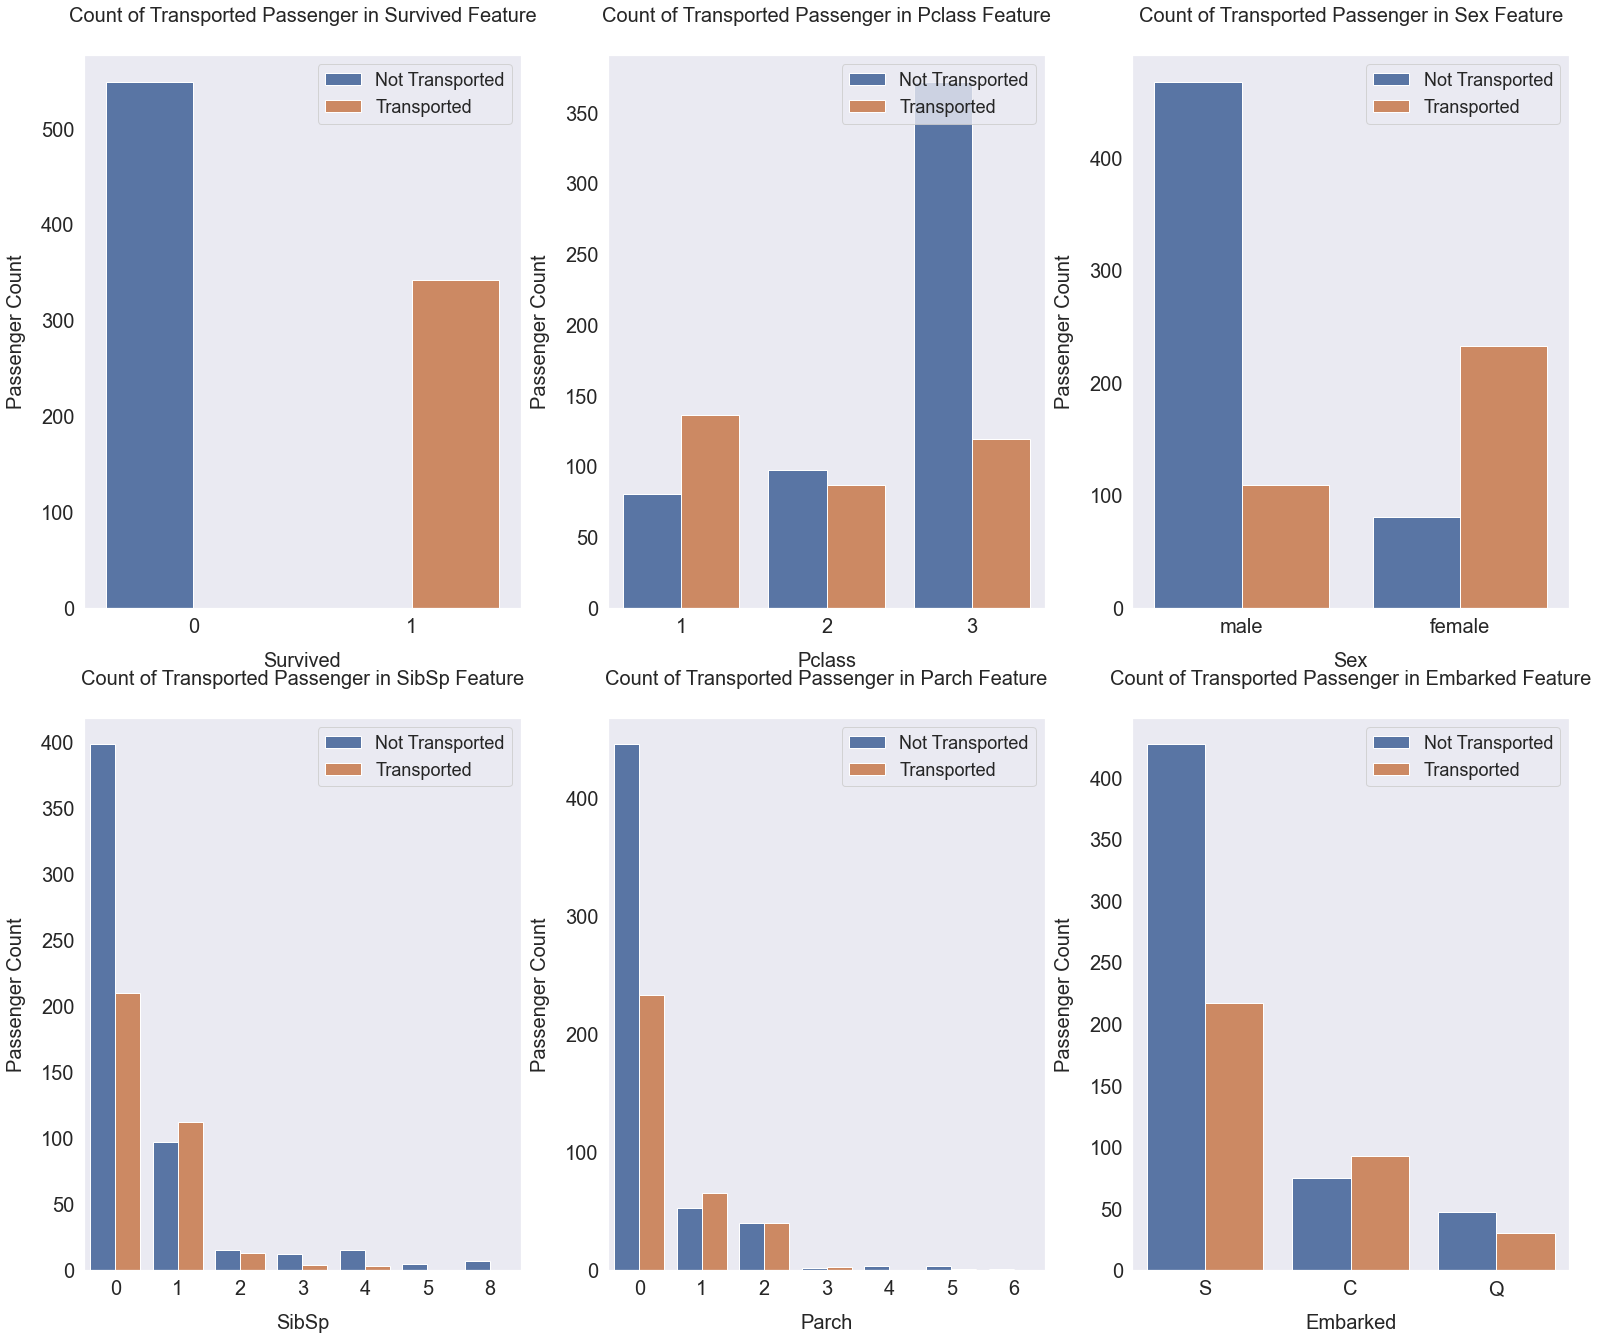

In [13]:
cat_features = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(15, 15))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=train)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Transported', 'Transported'], loc='upper right', prop={'size': 18})
    plt.title('Count of Transported Passenger in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

`Age`

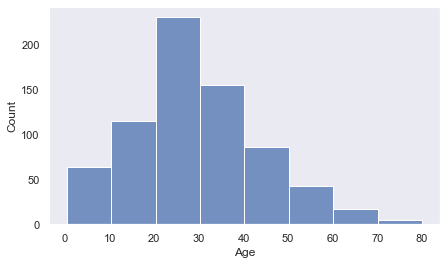

In [14]:
plt.figure(figsize=(7, 4))

sns.histplot(x=train['Age'], bins=8)

plt.show()

In [15]:
train['Age'].fillna(train['Age'].median(), inplace=True)

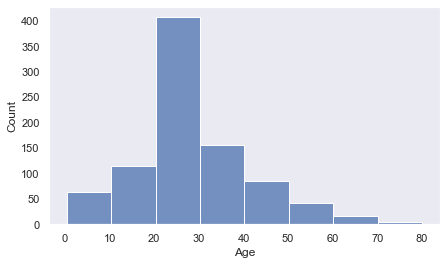

In [16]:
plt.figure(figsize=(7, 4))

sns.histplot(x=train['Age'], bins=8)

plt.show()

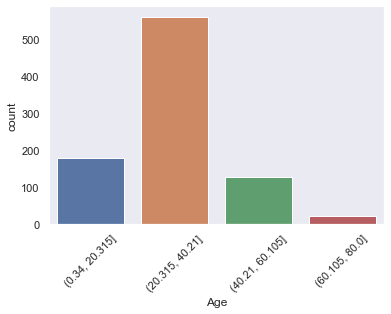

In [17]:
age_binned = pd.cut(train['Age'], 4)

sns.countplot(x=age_binned)
plt.xticks(rotation=45)

plt.show()

In [18]:
train['Age_binned'] = pd.cut(train['Age'], 4, labels=['Youth', 'Middle', 'Adult', 'Elder'])

`Embarked`

In [19]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_binned
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Middle
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Elder


In [20]:
train['Embarked'].fillna('S', inplace=True)

In [21]:
train.iloc[[61, 829]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_binned
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S,Middle
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S,Elder


`Cabin`

In [22]:
train.drop('Cabin', axis=1, inplace=True)

In [23]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Age_binned     0
dtype: int64

`Data Transformation`

In [24]:
train.drop(['PassengerId', 'Name', 'Ticket', 'Age'], axis=1, inplace=True)

In [25]:
train = pd.get_dummies(train)

In [26]:
train.head()

,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_binned_Youth,Age_binned_Middle,Age_binned_Adult,Age_binned_Elder
0,0,3,1,0,7.2500,0,1,0,0,1,0,1,0,0
1,1,1,1,0,71.2833,1,0,1,0,0,0,1,0,0
2,1,3,0,0,7.9250,1,0,0,0,1,0,1,0,0
3,1,1,1,0,53.1000,1,0,0,0,1,0,1,0,0
4,0,3,0,0,8.0500,0,1,0,0,1,0,1,0,0


## XGBoost

In [27]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [28]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [30]:
# Initialize XGB
xgb = XGBClassifier(n_estimators=100, max_depth=6, random_state=1)

# Fit XGB to traning set
xgb.fit(X_train, y_train)

# Predict labels of test set, y_pred
y_pred = xgb.predict(X_test)

score = accuracy_score(y_pred, y_test)

print('Score: ' + str(score*100))

Score: 81.16591928251121


In [31]:
# Initialize XGB
xgb = XGBClassifier(booster='gbtree', max_depth=6, learning_rate=0.1, n_estimators=100, random_state=1, n_jobs=-1)

# Fit XGB to traning set
xgb.fit(X_train, y_train)

# Predict labels of test set, y_pred
y_pred = xgb.predict(X_test)

score = accuracy_score(y_pred, y_test)

print('Score: ' + str(score*100))

Score: 82.51121076233184
